## Comparison of rectangular signal analytic Fourier transform and its FFT

In this notebook we check out the analytic Fourier transform of a rectangular PSF and compare it to its FFT. A rectangular signal has 1/x like tails, so it's always undersampled for a few pixel width signal.

The interesting point is that the FFT always flat (zero derivative) at the edge of the FFT region (at 1/2 frequency).

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.integrate as s_int
import numpy as np
import sympy as sp
from sympy import Heaviside

In [2]:
x, k = sp.symbols('x k', real=True)
s1, s2 = sp.symbols('sigma1 sigma2', positive=True)

In [3]:
gPsf = 0.5/s1 * sp.Heaviside(-x+s1) * sp.Heaviside(x+s1)
display(gPsf)

0.5*Heaviside(sigma1 - x)*Heaviside(sigma1 + x)/sigma1

In [4]:
# The Fourier transform of the square PSF
ftPsf = sp.fourier_transform(gPsf, x, k)
display(ftPsf)

0.5*sin(2*pi*k*sigma1)/(pi*k*sigma1)

### $\sigma_1=5$, $\sigma_2=10$
The "sigma" is interpreted here as the half width of the signal.

In [5]:
# f1 : the numerical function for PSF1 in Fourier space
f1 = ftPsf.subs({s1 : 5})
display(f1)
f1 = sp.lambdify(k, f1)

0.1*sin(10*pi*k)/(pi*k)

In [6]:
f2 = ftPsf.subs({s1 : 10})
display(f2)
f2 = sp.lambdify(k, f2)

0.05*sin(20*pi*k)/(pi*k)

### Comparison to the FFT solution focusing on the sampling

In [7]:
def createPaddedArray(sigma):
    A = np.zeros((256,256), dtype=float)
    v = 1./(4. * sigma*sigma)
    A[:sigma, :sigma] = v
    A[-sigma:, :sigma] = v
    A[-sigma:, -sigma:] = v
    A[:sigma, -sigma:] = v
    return A

### $\sigma = 5$

In [8]:
R2 = createPaddedArray(5)

<IPython.core.display.Javascript object>


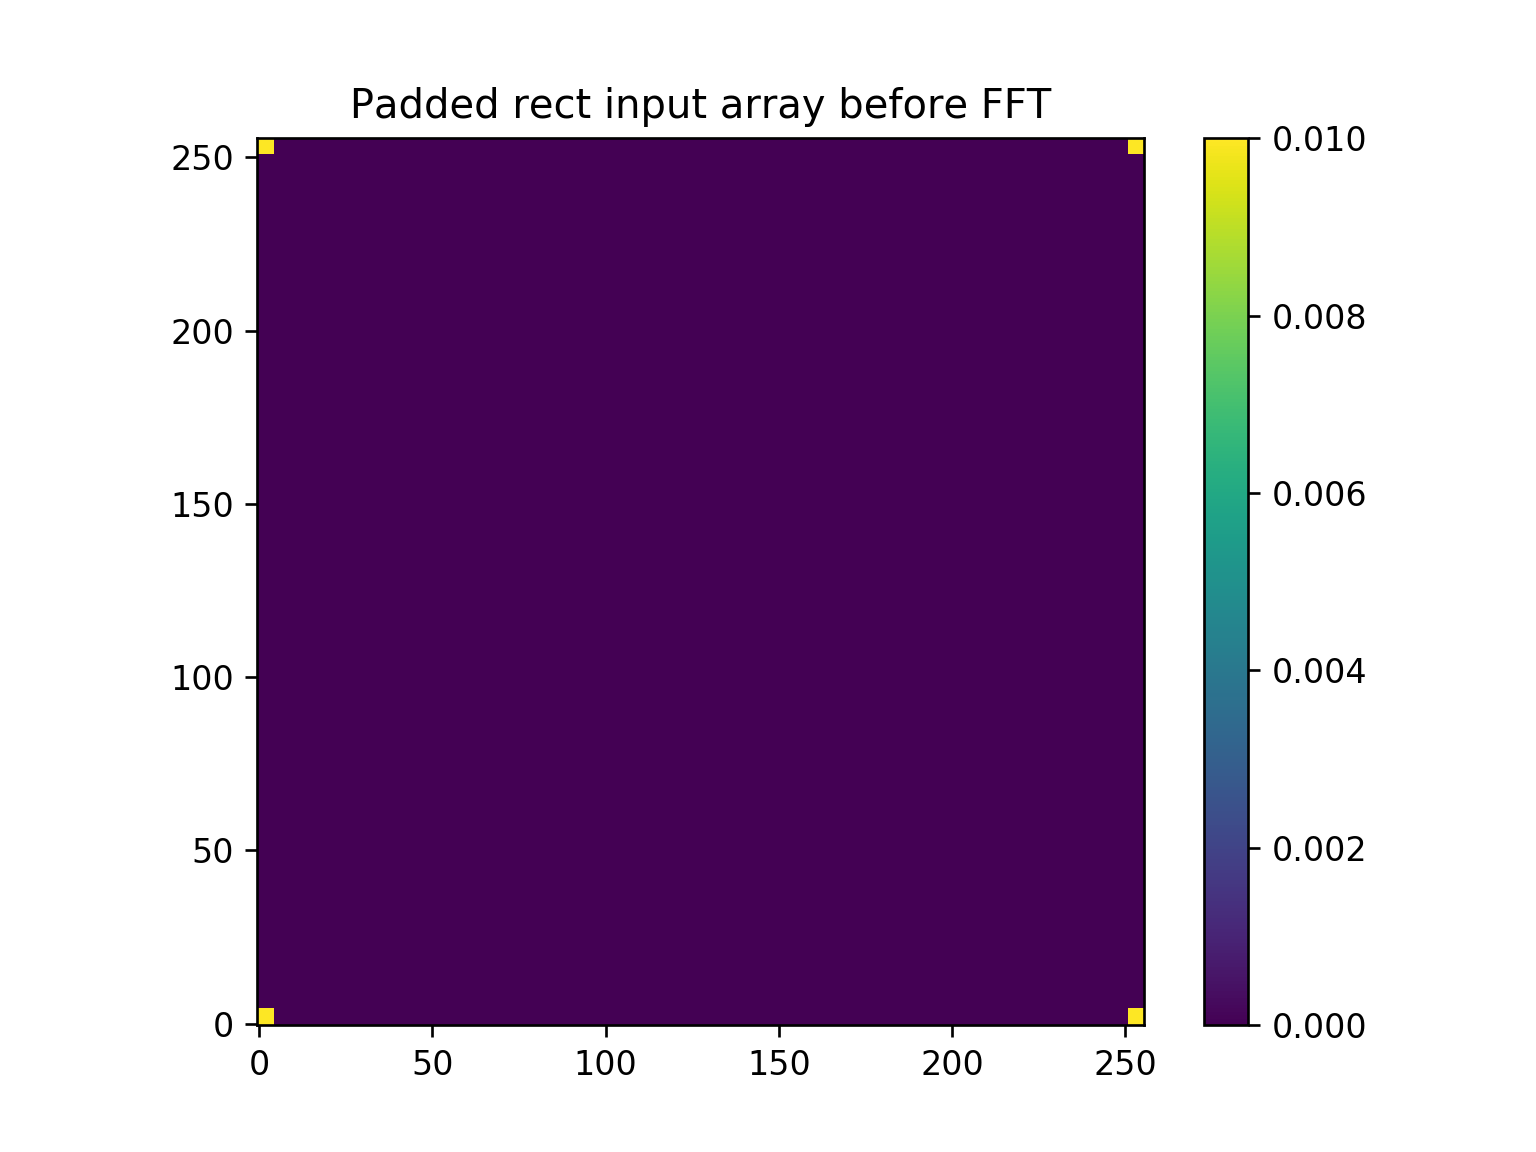

Text(0.5, 1.0, 'Padded rect input array before FFT')

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cs = ax.imshow(R2, origin='bottom')
fig.colorbar(cs)
ax.set_title("Padded rect input array before FFT")

In [10]:
fR2 = np.fft.fft2(R2)

<IPython.core.display.Javascript object>


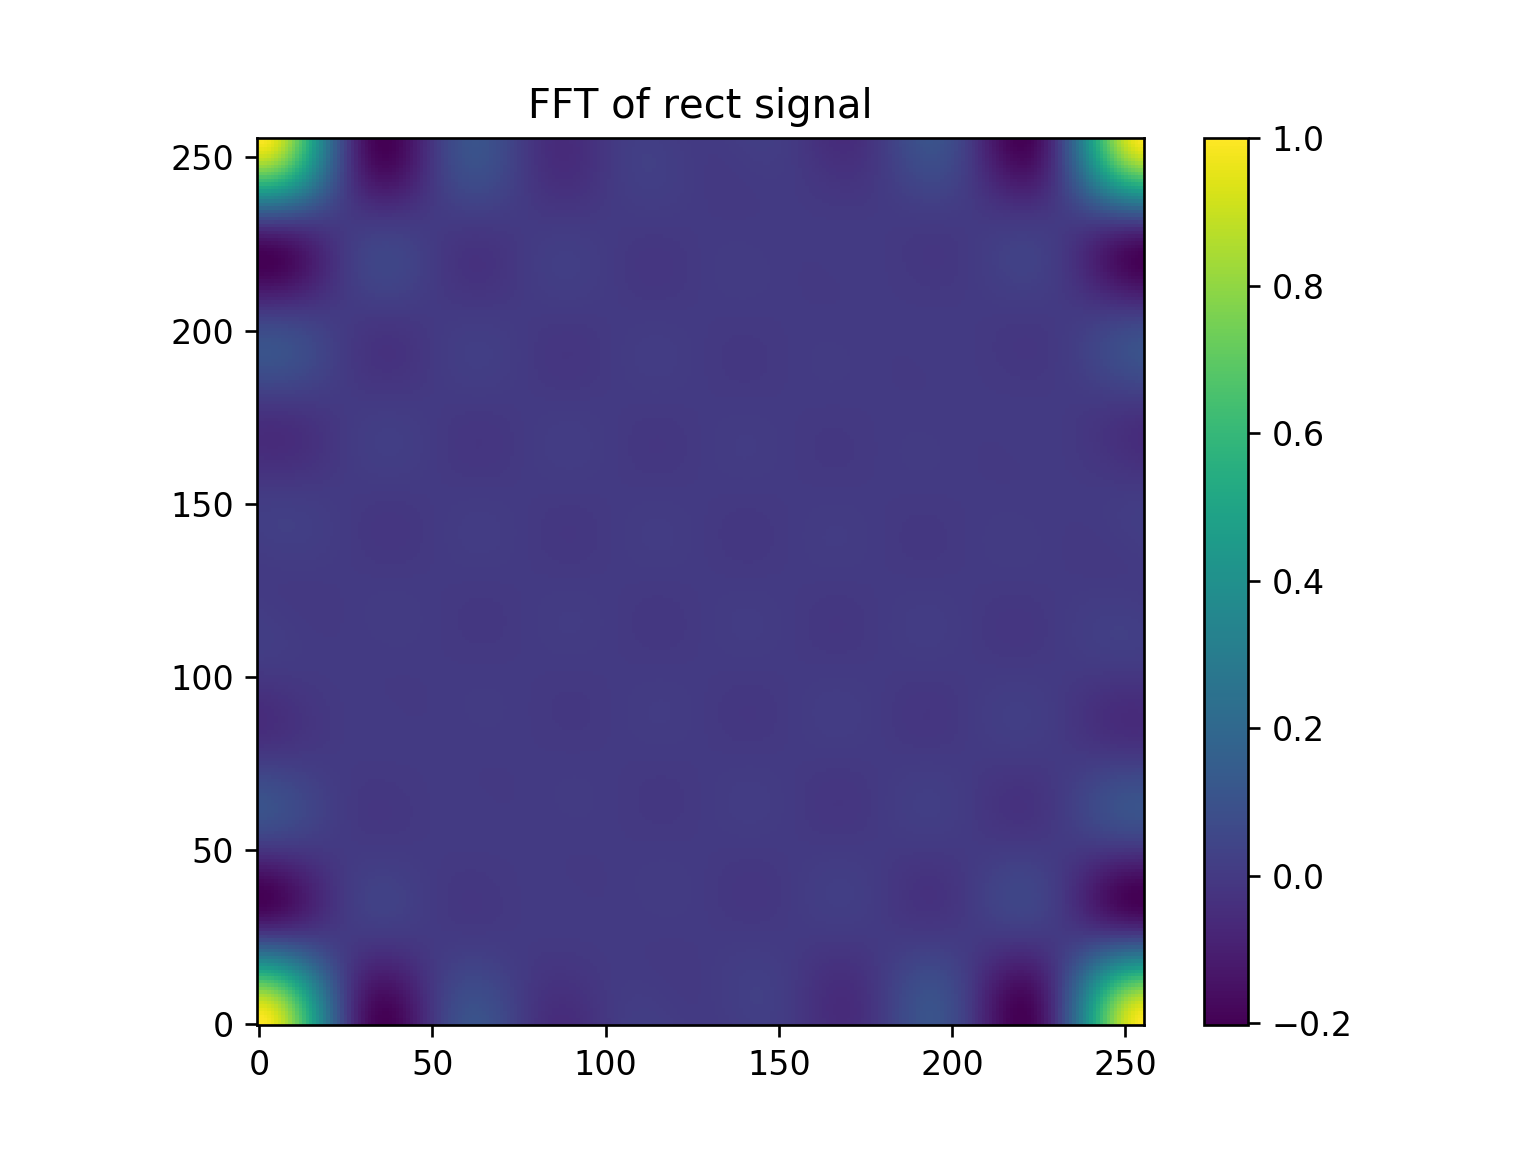

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cs = ax.imshow(fR2.real, origin='bottom')
ax.set_title("FFT of rect signal")
fig.colorbar(cs)

<IPython.core.display.Javascript object>


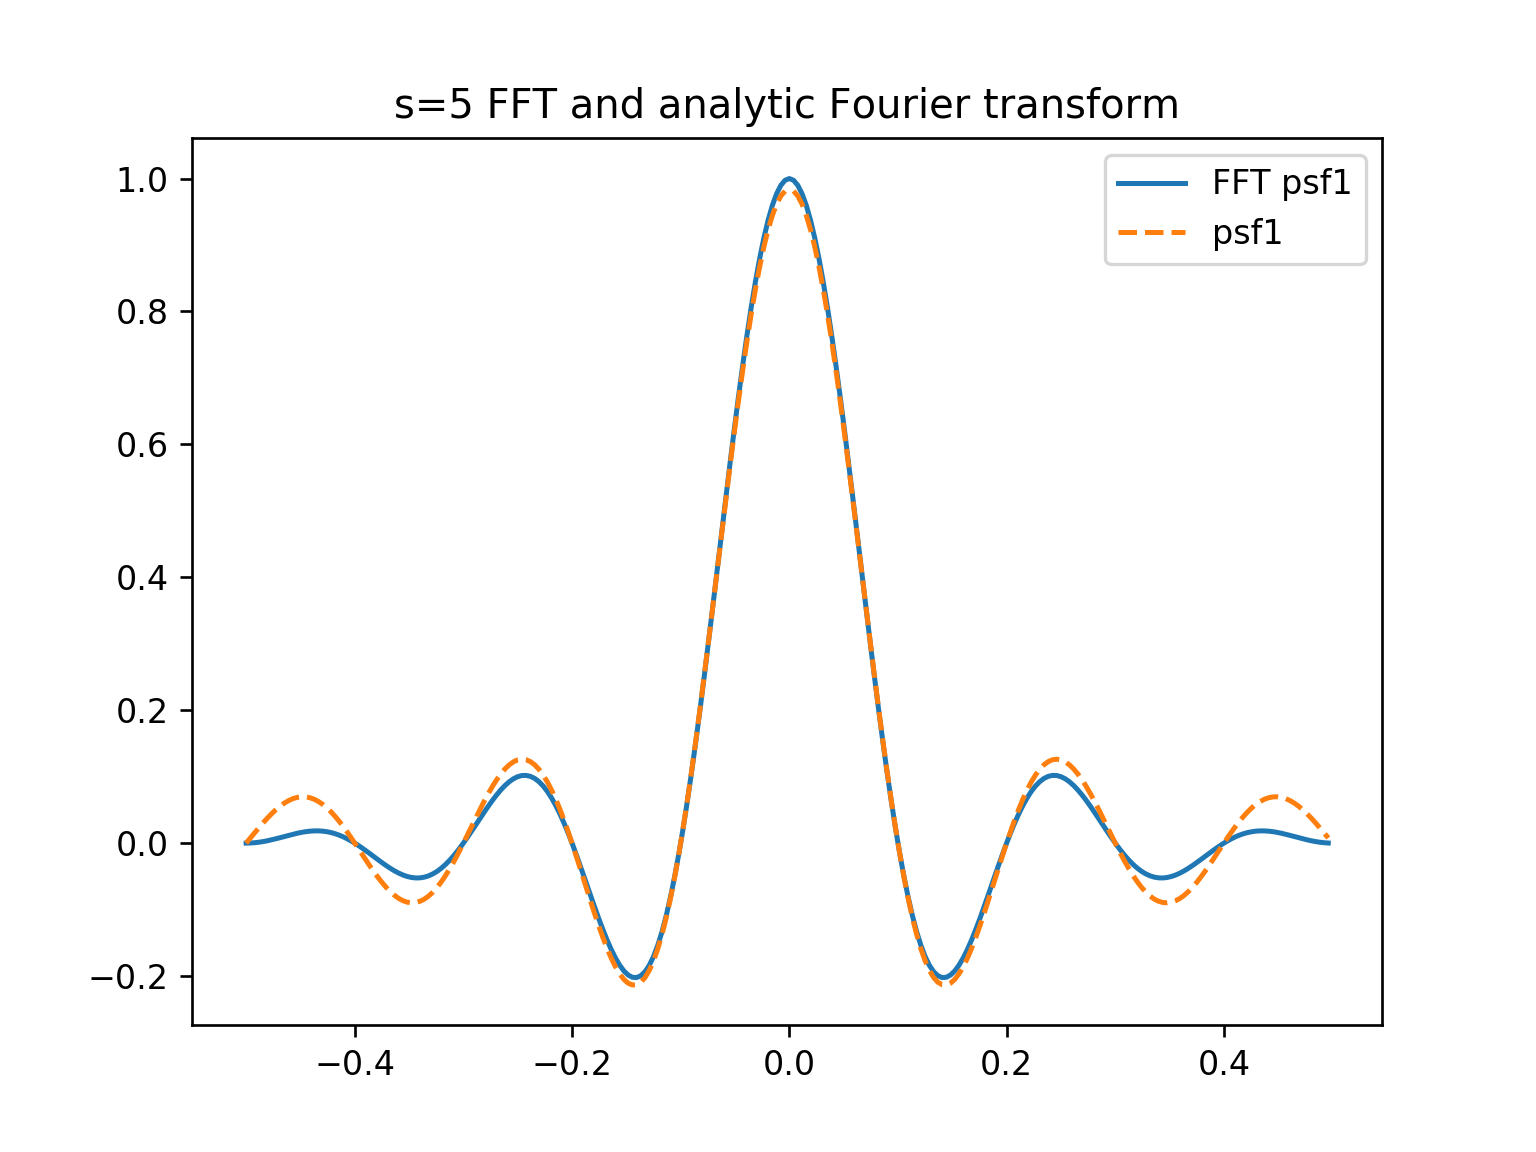

<string>:2: RuntimeWarning: invalid value encountered in true_divide


Text(0.5, 1.0, 's=5 FFT and analytic Fourier transform')

In [12]:
D = np.zeros(256)
D[:128] = fR2.real[0,128:]
D[128:] = fR2.real[0,:128]
X = np.arange(-128,128) / 256
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(X, D,'-', label='FFT psf1')
ax.plot(X, f1(X)*f1(0.01), '--', label='psf1')
ax.legend()
ax.set_title("s=5 FFT and analytic Fourier transform")

------

### $\sigma=2$

In [13]:
R2 = createPaddedArray(2)
fR2 = np.fft.fft2(R2)

<IPython.core.display.Javascript object>


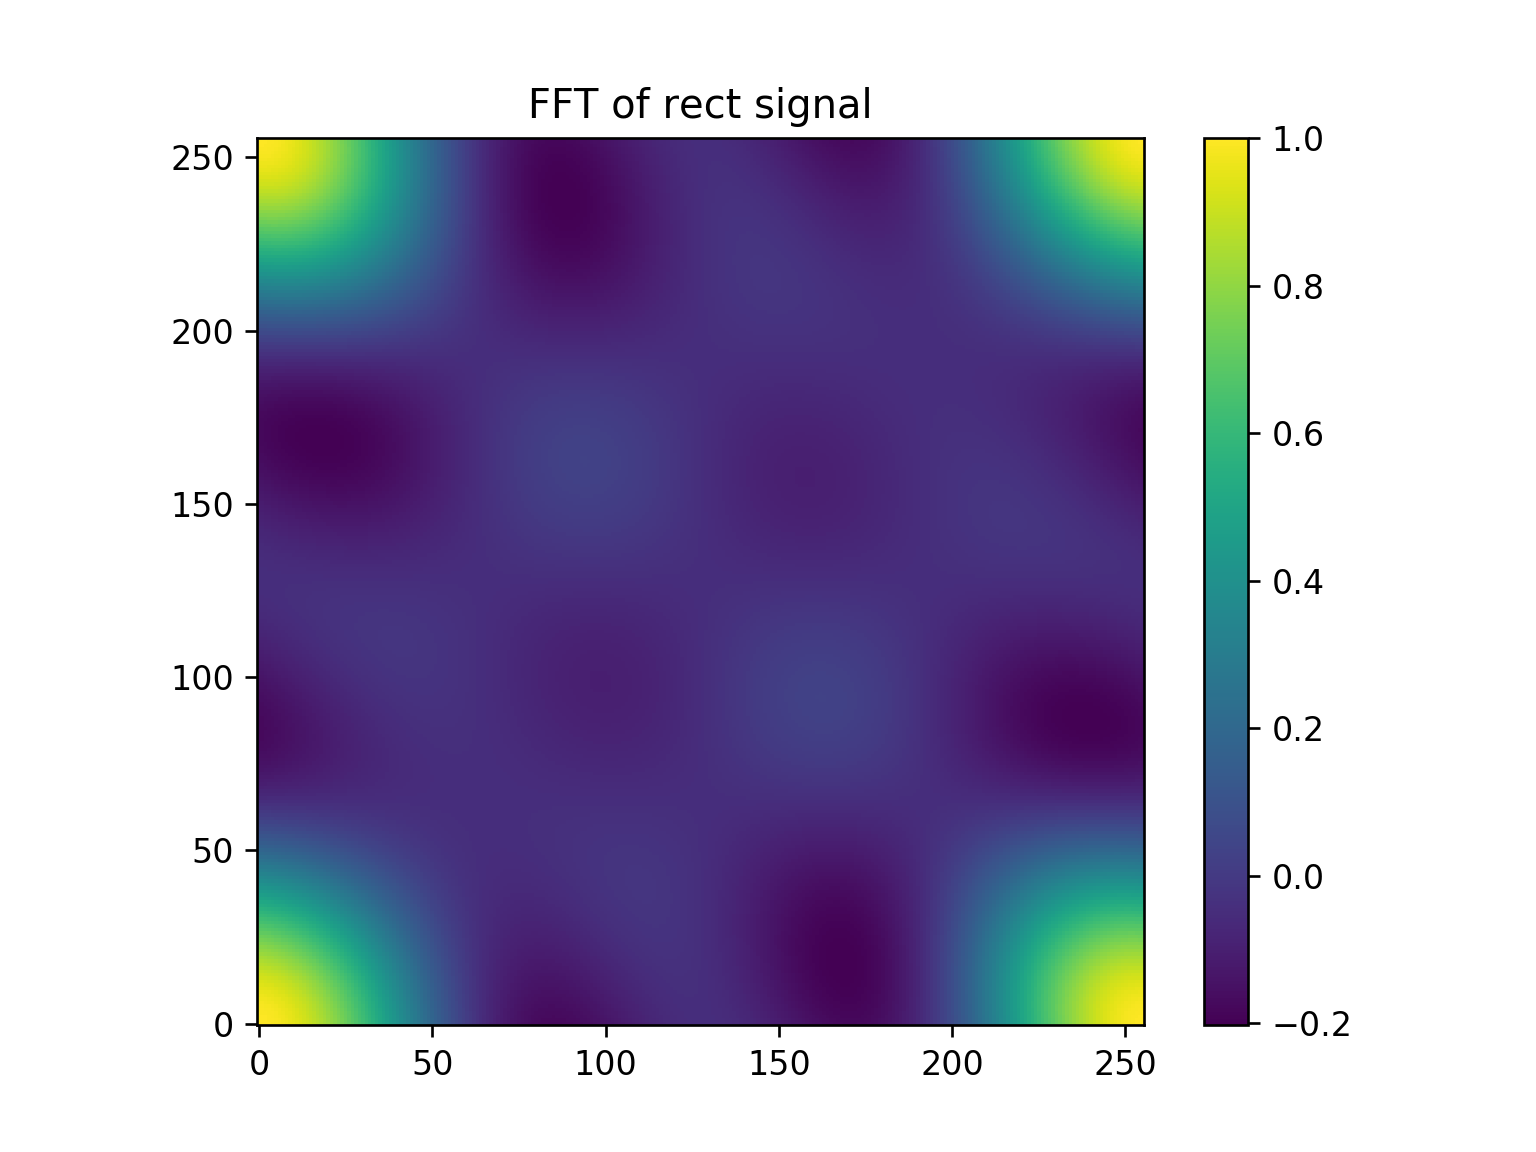

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(fR2.real, origin='bottom')
ax.set_title("FFT of rect signal")
fig.colorbar(cs)

In [15]:
# f1 : the numerical function for PSF1 in Fourier space
# r1 : the numerical function for PSF1 in real space
f_2 = ftPsf.subs({s1 : 2})
display(f2)
f_2 = sp.lambdify(k, f_2)

<function _lambdifygenerated(k)>

<IPython.core.display.Javascript object>


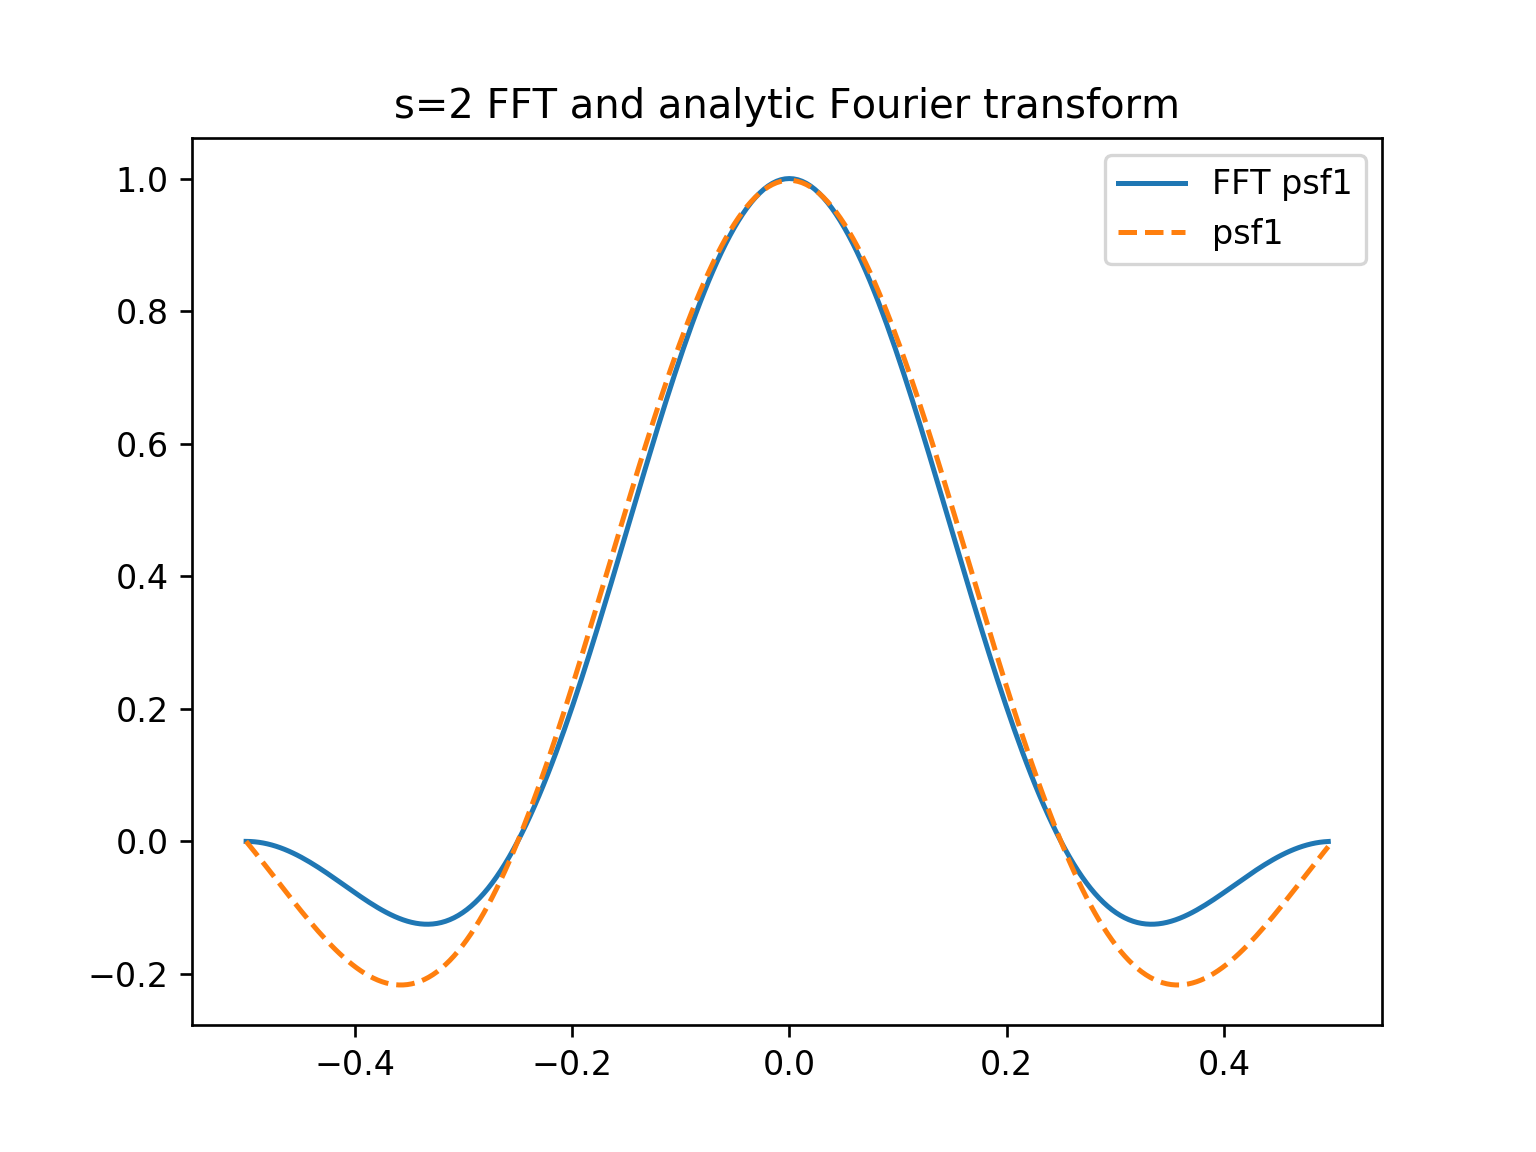

Text(0.5, 1.0, 's=2 FFT and analytic Fourier transform')

In [17]:
D = np.zeros(256)
D[:128] = fR2.real[0,128:]
D[128:] = fR2.real[0,:128]
X = np.arange(-128,128) / 256 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(X, D,'-', label='FFT psf1')
ax.plot(X, f_2(X)*f_2(0.01), '--', label='psf1')
ax.legend()
ax.set_title("s=2 FFT and analytic Fourier transform")